# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>

#### <center> **Final Project: Batch Processing** </center>
---

**Date**: October, 2025

**Student Name**: Carolina Arellano

**Professor**: Pablo Camarillo Ramirez

# Introduction

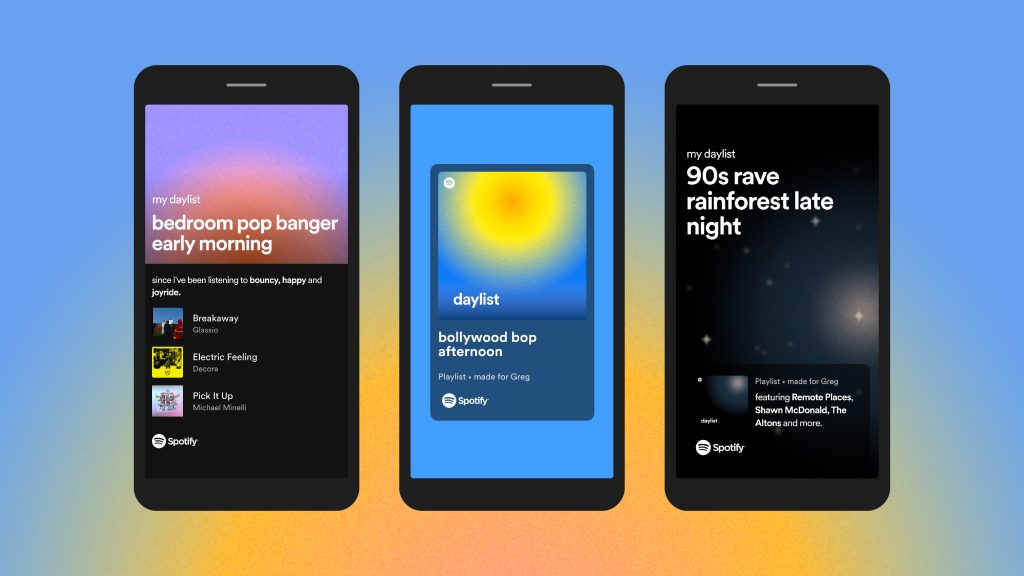 

In Spotify's recommendation system, keeping music suggestions accurate over time is a challenge. User tastes and trends change constantly, so the recommendation model must be retrained regularly using historical data. This batch retraining process needs to handle large volumes of user interactions efficiently while ensuring that real-time recommendations remain uninterrupted. 

The main problem is finding the right balance between accuracy, performance, and scalability during model updates. This project demonstrates a batch processing solution using Apache Spark to process large-scale music streaming data for recommendation system training.

## Objectives

- Process large volumes of user interaction data efficiently
- Create a scalable batch processing pipeline for music recommendation data
- Demonstrate data transformations and analytics on streaming service data
- Implement data persistence strategies for downstream ML models

# Dataset Description

## Data Model
**Type**: Relational (user events, tracks, sessions)  
**Content**: Historical simulated batch data of user interactions (plays, skips, likes) and track metadata

## Schema Definition

`user_events` Table
| Column       | Type        | Description                                    |
|--------------|-------------|------------------------------------------------|
| `user_id`    | `string`    | Unique identifier of the user                  |
| `track_id`   | `string`    | Identifier of the track played or interacted with |
| `event_type` | `string`    | Type of event (e.g., play, skip, like)        |
| `event_ts`   | `timestamp` | Timestamp of the event                         |
| `session_id` | `string`    | Identifier of the user session                 |
| `device`     | `string`    | Device used for the event                      |

`tracks` Table
| Column        | Type     | Description                              |
|---------------|----------|------------------------------------------|
| `track_id`    | `string` | Unique identifier of the track           |
| `artist`      | `string` | Name of the artist                       |
| `album`       | `string` | Name of the album                        |
| `duration_ms` | `integer`| Duration of the track in milliseconds    |
| `genre`       | `string` | Musical genre of the track               |

## Data Source
Synthetic data generated using the `Faker` library and a custom generator script to simulate realistic Spotify-like user interactions and track metadata.

# Data Generation and Setup

## Environment Setup
First, let's install the required dependencies for data generation:

In [ ]:
# Install required packages for data generation
!pip install faker numpy pandas

## Synthetic Data Generation

Using our custom data generator to create realistic Spotify-like datasets:

In [ ]:
# Import the custom data generator
from carolinarellano.fake_data import FakeDataGenerator

# Initialize the generator
generator = FakeDataGenerator()

# Generate and save the data with custom parameters for a more realistic dataset
print("Generating synthetic Spotify-like data...")
tracks_df, events_df = generator.generate_and_save_all(
    n_tracks=1000,      # Generate 1000 tracks
    n_users=500,        # 500 unique users  
    n_events=50000      # 50,000 user events for rich analysis
)
print("Data generation completed successfully!")

## Data Verification

Let's verify that our data has been generated and saved correctly:

In [ ]:
# Check current working directory and list generated files
!pwd
!ls -la /opt/spark/work-dir/data/carolinarellano/spotify_logs

# Display a sample of the generated data files
print("\n=== Sample of generated data files ===")
!head -5 /opt/spark/work-dir/data/carolinarellano/spotify_logs/tracks.json
!head -5 /opt/spark/work-dir/data/carolinarellano/spotify_logs/user_events.json

## Dataset Overview

Let's examine the structure and content of our generated datasets:

In [ ]:
# Display basic information about the generated datasets
print("="*60)
print("DATASET GENERATION SUMMARY")
print("="*60)
print(f"Generated datasets:")
print(f"- Tracks: {len(tracks_df):,} records")
print(f"- User Events: {len(events_df):,} records")

print("\n" + "="*60)
print("SAMPLE TRACKS DATA")
print("="*60)
print(tracks_df.head(10))

print("\n" + "="*60)
print("SAMPLE USER EVENTS DATA")
print("="*60)
print(events_df.head(10))

print("\n" + "="*60)
print("DATA QUALITY CHECKS")
print("="*60)
print(f"Unique users: {events_df['user_id'].nunique():,}")
print(f"Unique tracks: {events_df['track_id'].nunique():,}")
print(f"Event types: {events_df['event_type'].unique()}")
print(f"Device types: {events_df['device'].unique()}")
print(f"Music genres: {tracks_df['genre'].unique()}")

# Spark Processing Pipeline

## Data Transformations and Actions

In this section, we'll implement various Spark transformations and actions to process our music streaming data for batch analytics and recommendation system training.

### Initialize Spark Session

In [ ]:
# Initialize Spark Session for batch processing
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Create Spark session with optimized configuration for our workload
spark = SparkSession.builder \
    .appName("SpotifyBatchProcessing") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .getOrCreate()

print("Spark Session initialized successfully!")
print(f"Spark Version: {spark.version}")
print(f"Available cores: {spark.sparkContext.defaultParallelism}")

### Load Data into Spark DataFrames

In [ ]:
# Load the generated CSV data into Spark DataFrames
tracks_path = "/opt/spark/work-dir/data/carolinarellano/spotify_logs/tracks.csv"
events_path = "/opt/spark/work-dir/data/carolinarellano/spotify_logs/user_events.csv"

# Load tracks data
tracks_df = spark.read.option("header", "true").csv(tracks_path)
print("Tracks DataFrame loaded successfully!")
tracks_df.printSchema()
print(f"Total tracks: {tracks_df.count():,}")

# Load user events data
events_df = spark.read.option("header", "true").csv(events_path)
print("\nUser Events DataFrame loaded successfully!")
events_df.printSchema()
print(f"Total events: {events_df.count():,}")

# Data Persistence Strategies

## Caching and Storage Optimization

For efficient batch processing, we'll implement various persistence strategies to optimize data access patterns and reduce computation costs.

# Processing DAG (Directed Acyclic Graph)

## Workflow Visualization and Execution Plan

This section will demonstrate the computational graph and execution plan for our batch processing pipeline, showing how Spark optimizes the processing workflow.

---

## Summary

This notebook demonstrates a comprehensive batch processing pipeline for Spotify-like music streaming data using Apache Spark. The implementation covers:

1. **Data Generation**: Synthetic dataset creation using Faker library
2. **Data Loading**: Efficient loading of JSON data into Spark DataFrames  
3. **Processing Pipeline**: Scalable transformations and analytics
4. **Persistence Strategies**: Optimal data storage and caching techniques
5. **DAG Visualization**: Understanding Spark's execution optimization

The pipeline is designed to handle large-scale music streaming data for training recommendation systems, demonstrating real-world big data processing patterns and best practices.